In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'dataset/'
if not os.path.exists('images'):
    os.mkdir('images')

# Загрузка данных

In [3]:
# Загрузка данных о действующих сотрудниках
df_active = pd.read_excel(data_dir+'Действующие_сотрудники_31_12_2024.xlsx')
df_active = df_active.rename(columns={'ГРЕЙД': 'GRADE'})

# Загрузка данных об уволенных сотрудниках
df_fired = pd.read_excel(data_dir+'Уволенные_сотрудники_за_2024.xlsx')
df_fired = df_fired.rename(columns={'ГРЕЙД': 'GRADE'})

# Загрузка дополнительных сведений
df_add = pd.read_excel(data_dir+'Дополнительные_сведения_31_12_2024.xlsx')
df_add = df_add.drop('Пол', axis=1)

# Загрузка данных об отпусках
df_vacations = pd.read_excel(data_dir+'Общее_число_отпусков_2024.xlsx')

In [4]:
# Список файлов с курсами
course_files = [
    data_dir+'Число_пройденных_курсов_07_2024.xlsx',
    data_dir+'Число_пройденных_курсов_08_2024.xlsx',
    data_dir+'Число_пройденных_курсов_09_2024.xlsx',
    data_dir+'Число_пройденных_курсов_10_2024.xlsx',
    data_dir+'Число_пройденных_курсов_11_2024.xlsx',
    data_dir+'Число_пройденных_курсов_12_2024.xlsx'
]

# Создаем базовый датафрейм с уникальными PERSON_ID (если его нет)
# Либо загружаем первый файл как основу
first_file = course_files[0]
df_courses_hist = pd.read_excel(first_file)[['PERSON_ID']].drop_duplicates()

for file_path in course_files:
    # Извлекаем месяц и год из названия файла
    file_name = os.path.basename(file_path)
    month = file_name.split('_')[3]  # "07"
    year = file_name.split('_')[4].split('.')[0]  # "2024"
    period = f"{year}_{month}"  # "2024-07"
    
    # Загружаем файл и оставляем только нужные столбцы
    df = pd.read_excel(file_path)
    df = df[['PERSON_ID', 'COURSE_COUNT']].rename(columns={'COURSE_COUNT': 'COURSES_'+period})
    
    # Объединяем с основным датафреймом
    df_courses_hist = df_courses_hist.merge(df, on='PERSON_ID', how='left')

# Заполняем пропуски нулями (если нужно)
df_courses_hist.fillna(0, inplace=True)
df_courses_hist

,PERSON_ID,COURSES_2024_07,COURSES_2024_08,COURSES_2024_09,COURSES_2024_10,COURSES_2024_11,COURSES_2024_12
0,118915,28,11,8,5,1,0
1,119601,17,2,0,1,0,0
2,119075,15,1,0,0,0,0
3,119041,15,4,0,0,1,0
4,119082,13,0,0,0,0,0
...,...,...,...,...,...,...,...
23199,9914,0,0,0,0,0,0
23200,9919,0,0,1,0,0,0
23201,9920,0,0,0,0,0,0
23202,9923,0,0,0,0,0,0


In [5]:
# Загрузка данных об отпусках
df_career = pd.read_excel(data_dir+'Карьерные_изменения_31_12_2024.xlsx')

# Загрузка данных об отпусках
df_marks = pd.read_excel(data_dir+'Оценки_работы_2020_2023.xlsx')
df_marks = df_marks.drop('GRADE', axis=1)

# Присоединение к df_all
df_marks = df_marks.rename(columns={col: f'MARKS_{col}' for col in df_marks.columns[1:]})
df_marks.fillna(0, inplace=True)

# Загрузка данных об отпусках
df_senior = pd.read_excel(data_dir+'Стажи_31_12_2024.xlsx')

In [6]:
# Загрузка данных об отпусках
df_trainee = pd.read_csv(data_dir+'Был_стажером.csv')
df_trainee['WAS_TRAINEE'] = df_trainee['WAS_TRAINEE'].fillna('NO')

# df_all = df_all.merge(df_trainee, on='PERSON_ID', how='left')
# df_all['WAS_TRAINEE'] = df_all['WAS_TRAINEE'].fillna('NO')

In [7]:
# Загрузка данных об отпусках
df_absent = pd.read_excel(data_dir+'Общее_число_прогулов_2024.xlsx')

# df_all = df_all.merge(df_absent, on='PERSON_ID', how='left')
# df_all['DAYS_WITHOUT_VALID_REASONS'] = df_all['DAYS_WITHOUT_VALID_REASONS'].fillna(0)
# df_all['COUNT_BAD_VACATIONS'] = df_all['COUNT_BAD_VACATIONS'].fillna(0)

In [8]:
# Загрузка данных об отпусках
df_ill = pd.read_excel(data_dir+'Общее_число_пропусков_по_болезням_2024.xlsx')
df_ill = df_ill.rename(columns={'LAST_VACATION_DATE': 'LAST_ILLNESS_DATE'})

# df_all = df_all.merge(df_ill, on='PERSON_ID', how='left')
# df_all['ILL_DAYS'] = df_all['ILL_DAYS'].fillna(0)
# df_all['COUNT_ILL_VACATIONS'] = df_all['COUNT_ILL_VACATIONS'].fillna(0)
# df_all[['LAST_VACATION_DATE', 'LAST_ILLNESS_DATE']]

In [9]:
df_firedres = pd.read_csv(data_dir+'Причины увольнения.csv')
reason_mapping = dict(zip(df_firedres['Причины увольнения'], df_firedres['Voluntary / Non-voluntary']))
reason_mapping

# df_all['TERMINATION_TYPE'] = df_all['TERMINATION_REASON'].map(reason_mapping)
# df_all['TERMINATION_TYPE'] = df_all['TERMINATION_TYPE'].fillna('unknown')
# print(df_all[['TERMINATION_REASON', 'TERMINATION_TYPE']].value_counts())

{'несоответствие занимаемой должности': 'non-voluntary',
 'изменение места жительства': 'non-voluntary',
 'предложение зарплаты, в 2 раза и более превышающее текущий уровень': 'non-voluntary',
 'смена сферы деятельности / профессии / рода занятий': 'voluntary',
 'баланс работа-личная жизнь': 'voluntary',
 'перевод': 'non-voluntary',
 'нарушение трудовой дисциплины': 'non-voluntary',
 'семейные обстоятельства': 'non-voluntary',
 'уровень заработной платы': 'voluntary',
 'структурные изменения': 'non-voluntary',
 'работа в режиме постоянного стресса': 'voluntary',
 'состояние здоровья': 'non-voluntary',
 'истечение договора': 'non-voluntary',
 'выход на пенсию': 'non-voluntary',
 'призыв в армию (срочный, по контракту)': 'non-voluntary',
 'неисполнение трудовых обязанностей': 'non-voluntary',
 'отношения с руководителем': 'voluntary',
 'совмещение работы и учебы': 'non-voluntary',
 'отсутствие карьерного роста': 'voluntary',
 'геополитика': 'non-voluntary',
 'нарушение законодательства /

In [10]:
# target_id = 6000
# found_in = []

# print(f"Поиск информации по сотруднику ID: {target_id}\n")
# for df_name, df in dataset.items():
#     try:
#         # Проверяем наличие колонки PERSON_ID
#         if 'PERSON_ID' in df.columns:
#             records = df[df['PERSON_ID'] == target_id]
            
#             if not records.empty:
#                 found_in.append(df_name)
#                 print(f"[~] Найдено в {df_name}:")
#                 print(f"Количество записей: {len(records)}")

#                 cols_to_show = [col for col in records.columns]
#                 print(records[cols_to_show].to_string(index=False))
#                 print("\n" + "-"*50 + "\n")
#     except Exception as e:
#         print(f"Ошибка при обработке {df_name}: {str(e)}")

# print("\nИтоговый отчет:")
# print(f"[!] Сотрудник найден в {len(found_in)} датафреймах из {len(dataset)}")
# print("Датафреймы с информацией:", ", ".join(found_in))

In [11]:
dataset = {
    'df_active': df_active,
    'df_fired': df_fired,
    'df_add': df_add,
    'df_vacations': df_vacations,
    'df_courses_hist': df_courses_hist,
    'df_career': df_career,
    'df_marks': df_marks,
    'df_senior': df_senior,
    'df_trainee': df_trainee,
    'df_absent': df_absent,
    'df_ill': df_ill,
}

# Pre-processing

In [12]:
df_active['BIRTH_DT'] = pd.to_datetime(df_active['BIRTH_DT']).dt.date
df_active['RECEPTION_DT'] = pd.to_datetime(df_active['RECEPTION_DT']).dt.date

In [13]:
# Перестановка PERSON_ID в начало
df_fired = df_fired[['PERSON_ID'] + [col for col in df_fired.columns if col != 'PERSON_ID']]

# Переименование столбцов
df_fired = df_fired.rename(columns={
    'Дата операции': 'OPERATION_DATE',
    'Причины увольнения': 'TERMINATION_REASON',
    'Отдел': 'DEPARTMENT'
})

In [14]:
df_add = df_add.rename(columns={
    'Дата приема': 'HIRE_DATE',
    'Дата увольнения': 'TERMINATION_DATE',
    'Дата рождения': 'BIRTH_DATE',
    'Возраст': 'AGE',
    'Состояние в браке': 'MARITAL_STATUS',
    'Отношение к военной службе': 'MILITARY_SERVICE_STATUS',
    'Образование': 'EDUCATION'
})

In [15]:
df_vacations['LAST_VACATION_DATE'] = pd.to_datetime(df_vacations['LAST_VACATION_DATE']).dt.date

In [16]:
df_absent['LAST_BAD_VACATION_DATE'] = pd.to_datetime(df_absent['LAST_BAD_VACATION_DATE']).dt.date

In [17]:
df_ill['LAST_ILLNESS_DATE'] = pd.to_datetime(df_ill['LAST_ILLNESS_DATE']).dt.date

### Очистка df_add

In [18]:
# 1. Создаем копию исходных данных для очистки
df_add_cleaned = df_add.copy()

# 2. Преобразуем даты в datetime с указанием правильного формата
df_add_cleaned['HIRE_DATE'] = pd.to_datetime(df_add_cleaned['HIRE_DATE'], format='%d.%m.%Y', errors='coerce')
df_add_cleaned['TERMINATION_DATE'] = pd.to_datetime(df_add_cleaned['TERMINATION_DATE'], format='%d.%m.%Y', errors='coerce')

# Проверяем, есть ли проблемы с преобразованием дат
print("Пропущенные значения после преобразования дат:")
print(df_add_cleaned[['HIRE_DATE', 'TERMINATION_DATE']].isna().sum())

# 3. Определяем фейковые увольнения (день в день)
fake_terminations = (df_add_cleaned['TERMINATION_DATE'] == df_add_cleaned['HIRE_DATE'])

# 4. Определяем сотрудников, которые все еще работают (TERMINATION_DATE = 2099-01-01)
still_working = (df_add_cleaned['TERMINATION_DATE'] == pd.to_datetime('2099-01-01'))

# 5. Фильтруем данные:
# - Удаляем все фейковые увольнения
# - Для работающих сотрудников оставляем только актуальную запись
df_add_cleaned = df_add_cleaned[
    (~fake_terminations) |  # Исключаем фейковые увольнения
    (still_working)         # Или это актуальная запись о работающем сотруднике
]

# 6. Для работающих сотрудников оставляем только последнюю запись о приеме
latest_hire_mask = df_add_cleaned.groupby('PERSON_ID')['HIRE_DATE'].transform('max') == df_add_cleaned['HIRE_DATE']
df_add_cleaned = df_add_cleaned[~still_working | (still_working & latest_hire_mask)]

# 7. Проверяем общую статистику
print(f"\nИсходное количество записей: {len(df_add)}")
print(f"Очищенных записей: {len(df_add_cleaned)}")
print(f"Удалено записей: {len(df_add) - len(df_add_cleaned)}")

# 8. Проверяем пример сотрудника с несколькими записями
if len(df_add_cleaned['PERSON_ID'].value_counts()) > 0:
    sample_person = df_add_cleaned['PERSON_ID'].value_counts().index[0]
    print("\nПример очищенных данных для сотрудника:", sample_person)
    display(df_add_cleaned[df_add_cleaned['PERSON_ID'] == sample_person][['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE']])

Пропущенные значения после преобразования дат:
HIRE_DATE           0
TERMINATION_DATE    0
dtype: int64

Исходное количество записей: 279992
Очищенных записей: 148337
Удалено записей: 131655

Пример очищенных данных для сотрудника: 57085


C:\Users\xgorio\AppData\Local\Temp\ipykernel_15212\1700914539.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_add_cleaned = df_add_cleaned[~still_working | (still_working & latest_hire_mask)]


,PERSON_ID,HIRE_DATE,TERMINATION_DATE
5316,57085,2016-11-01,2016-12-08
12179,57085,2017-02-16,2017-03-14
21681,57085,2015-06-01,2015-08-31
22760,57085,2019-05-06,2019-06-06
24578,57085,2017-04-18,2017-06-26
...,...,...,...
219516,57085,2022-05-04,2022-06-06
230294,57085,2021-10-13,2021-12-16
252723,57085,2022-08-04,2022-09-30
258277,57085,2022-11-30,2022-12-26


# EDA

### Введение

In [19]:
'''
df_active.columns:
['PERSON_ID', 'BIRTH_DT', 'SEX', 'RECEPTION_DT', 'CITY', 'GRADE']

df_fired.columns:
['PERSON_ID', 'OPERATION_DATE', 'TERMINATION_REASON', 'DEPARTMENT', 'GRADE']

df_add.columns:
['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE', 'BIRTH_DATE', 'AGE', 'GENDER', 'MARITAL_STATUS', 'MILITARY_SERVICE_STATUS', 'EDUCATION']

df_vacations.columns:
['PERSON_ID', 'VACATION_COUNT_2024', 'LAST_VACATION_DATE']

df_courses_hist.columns:
['PERSON_ID', 'COURSES_2024-07', 'COURSES_2024-08', 'COURSES_2024-09', 'COURSES_2024-10', 'COURSES_2024-11', 'COURSES_2024-12']

df_career.columns:
['PERSON_ID', 'GR_UP_CHANGE', 'C_C_CHANGE', 'POS_D_CHANGE']

df_marks.columns:
['PERSON_ID', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023']

df_senior.columns:
['PERSON_ID', 'FULL_SENIORITY', 'GRADE_SENIORITY_LAST', 'AVG_GRADE_SENIORITY']

df_trainee.columns:
['PERSON_ID', 'WAS_TRAINEE']

df_absent.columns:
['PERSON_ID', 'DAYS_WITHOUT_VALID_REASONS', 'COUNT_BAD_VACATIONS', 'LAST_BAD_VACATION_DATE']

df_ill.columns:
['PERSON_ID', 'ILL_DAYS', 'COUNT_ILL_VACATIONS', 'LAST_ILLNESS_DATE']
'''

"\ndf_active.columns:\n['PERSON_ID', 'BIRTH_DT', 'SEX', 'RECEPTION_DT', 'CITY', 'GRADE']\n\ndf_fired.columns:\n['PERSON_ID', 'OPERATION_DATE', 'TERMINATION_REASON', 'DEPARTMENT', 'GRADE']\n\ndf_add.columns:\n['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE', 'BIRTH_DATE', 'AGE', 'GENDER', 'MARITAL_STATUS', 'MILITARY_SERVICE_STATUS', 'EDUCATION']\n\ndf_vacations.columns:\n['PERSON_ID', 'VACATION_COUNT_2024', 'LAST_VACATION_DATE']\n\ndf_courses_hist.columns:\n['PERSON_ID', 'COURSES_2024-07', 'COURSES_2024-08', 'COURSES_2024-09', 'COURSES_2024-10', 'COURSES_2024-11', 'COURSES_2024-12']\n\ndf_career.columns:\n['PERSON_ID', 'GR_UP_CHANGE', 'C_C_CHANGE', 'POS_D_CHANGE']\n\ndf_marks.columns:\n['PERSON_ID', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023']\n\ndf_senior.columns:\n['PERSON_ID', 'FULL_SENIORITY', 'GRADE_SENIORITY_LAST', 'AVG_GRADE_SENIORITY']\n\ndf_trainee.columns:\n['PERSON_ID', 'WAS_TRAINEE']\n\ndf_absent.columns:\n['PERSON_ID', 'DAYS_WITHOUT_VALID_REASONS', 'COUNT_BAD_VACATI

In [20]:
dataset = {
    'df_active': df_active,
    'df_fired': df_fired,
    'df_add': df_add,
    'df_add_cleaned': df_add_cleaned,
    'df_vacations': df_vacations,
    'df_courses_hist': df_courses_hist,
    'df_career': df_career,
    'df_marks': df_marks,
    'df_senior': df_senior,
    'df_trainee': df_trainee,
    'df_absent': df_absent,
    'df_ill': df_ill,
}

In [21]:
# for df_name, df in dataset.items():
#     print(f"\n{df_name}.rows:")
#     print(len(df))

In [22]:
def apply_misc_data(main_df, 
                    vacations=df_vacations, 
                    courses=df_courses_hist,
                    career=df_career,
                    marks=df_marks,
                    senior=df_senior,
                    trainee=df_trainee,
                    absent=df_absent,
                    ill=df_ill):

    merged_df = main_df.copy()

    dfs_to_merge = [
        (vacations, None),
        (courses, None),
        (career, None),
        (marks, None),
        (senior, None),
        (trainee, None),
        (absent, None),
        (ill, None)
    ]

    for df, suffix in dfs_to_merge:
        if df is not None and 'PERSON_ID' in df.columns:
            merged_df = merged_df.merge(
                df,
                on='PERSON_ID',
                how='left',
                suffixes=('', f'_{suffix}' if suffix else '')
            )
    
    return merged_df

### Таблица со всеми сотрудниками

#### ***df_add_cleaned_full_s***

In [23]:
df_add_cleaned_full = apply_misc_data(df_add_cleaned)
# df_add_cleaned_full.drop_duplicates(subset=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'])

df_add_cleaned_full_s = df_add_cleaned_full.sort_values(
    by=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'],
    ascending=[True, True, True]
)

df_add_cleaned_full_s

,PERSON_ID,HIRE_DATE,TERMINATION_DATE,BIRTH_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION,VACATION_COUNT_2024,LAST_VACATION_DATE,...,FULL_SENIORITY,GRADE_SENIORITY_LAST,AVG_GRADE_SENIORITY,WAS_TRAINEE,DAYS_WITHOUT_VALID_REASONS,COUNT_BAD_VACATIONS,LAST_BAD_VACATION_DATE,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE
107734,4004,2014-01-01,2099-01-01,23.07.1978,46,Состоит в зарегистрированном браке,Военнообязанный,"Высшее образование - специалитет, магистратура",5.0,2024-10-28,...,7243.0,1948.0,2526.5,NO,NaN,NaN,NaN,NaN,NaN,NaN
41601,4005,2006-03-20,2006-03-26,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42892,4005,2006-03-27,2006-03-31,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47397,4005,2006-04-12,2006-04-15,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51510,4005,2006-05-22,2006-06-01,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121106,125830,2025-01-17,2099-01-01,06.01.1975,50,NaN,NaN,Среднее общее образование,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121118,125840,2025-01-20,2099-01-01,15.06.1989,35,Состоит в зарегистрированном браке,Военнообязанный,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121127,125845,2025-01-20,2099-01-01,23.01.1979,45,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121124,125847,2025-01-20,2099-01-01,29.08.1993,31,NaN,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Уволенные и действующие сотрудники

In [24]:
df_add_cleaned_full_s[~df_add_cleaned_full_s['TERMINATION_DATE'].astype(str).str.startswith('2099')]

,PERSON_ID,HIRE_DATE,TERMINATION_DATE,BIRTH_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION,VACATION_COUNT_2024,LAST_VACATION_DATE,...,FULL_SENIORITY,GRADE_SENIORITY_LAST,AVG_GRADE_SENIORITY,WAS_TRAINEE,DAYS_WITHOUT_VALID_REASONS,COUNT_BAD_VACATIONS,LAST_BAD_VACATION_DATE,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE
41601,4005,2006-03-20,2006-03-26,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42892,4005,2006-03-27,2006-03-31,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47397,4005,2006-04-12,2006-04-15,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51510,4005,2006-05-22,2006-06-01,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42379,4005,2006-06-19,2006-06-25,16.08.1974,50,Состоит в зарегистрированном браке,NaN,"Высшее образование - специалитет, магистратура",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,125233,2024-12-24,2025-01-16,13.04.2003,21,NaN,NaN,Среднее общее образование,NaN,NaN,...,2.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92192,125419,2024-12-24,2024-12-25,30.10.2004,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96035,125425,2023-05-04,2023-12-07,14.03.1969,55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96036,125425,2024-01-09,2024-03-04,14.03.1969,55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
marks = df_add_cleaned_full_s[['MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023']]
result = df_add_cleaned_full_s[(marks > 0).any(axis=1)]
result = result.drop_duplicates(subset=['PERSON_ID'])

result['PERSON_ID'].value_counts()

PERSON_ID
112578    1
4004      1
112500    1
112498    1
112496    1
         ..
4015      1
4012      1
4011      1
4010      1
4008      1
Name: count, Length: 9842, dtype: int64

### Таблица с уволенными сотрудниками: 
#### ***df_add_fired2024_full_s***

In [26]:
voluntary_keywords = [
    'желание',
    'уход',
    'смена',
    'переход',
    'баланс',
    'отношения',
    'отсутствие',
    'время в пути',
    'стресс',
    'развиваться'
]

def determine_termination_type(reason):
    if pd.isna(reason):
        return 'unknown'
    reason_lower = str(reason).lower()
    for keyword in voluntary_keywords:
        if keyword in reason_lower:
            return 'voluntary'
    return 'non-voluntary'

In [27]:
df_add_2024 = df_add_cleaned[df_add_cleaned['TERMINATION_DATE'].astype(str).str.contains('2024')]

df_add_fired2024 = pd.merge(
    df_add_2024,
    df_fired,
    on='PERSON_ID',
    how='inner'
)

df_add_fired2024['TERMINATION_TYPE'] = df_add_fired2024['TERMINATION_REASON'].map(reason_mapping)
df_add_fired2024['TERMINATION_TYPE'] = df_add_fired2024['TERMINATION_TYPE'].fillna('unknown')

mask = df_add_fired2024['TERMINATION_TYPE'] == 'unknown'
df_add_fired2024.loc[mask, 'TERMINATION_TYPE'] = df_add_fired2024.loc[mask, 'TERMINATION_REASON'].apply(determine_termination_type)

In [28]:
df_add_fired2024_full = apply_misc_data(df_add_fired2024)
df_add_fired2024_full = df_add_fired2024_full.drop_duplicates(subset=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'])

df_add_fired2024_full_s = df_add_fired2024_full.sort_values(
    by=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'],
    ascending=[True, True, True]
)

# df_add_fired2024_full_s

In [29]:
df_add_fired2024_full_s.columns

Index(['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE', 'BIRTH_DATE', 'AGE',
       'MARITAL_STATUS', 'MILITARY_SERVICE_STATUS', 'EDUCATION',
       'OPERATION_DATE', 'TERMINATION_REASON', 'DEPARTMENT', 'GRADE',
       'TERMINATION_TYPE', 'VACATION_COUNT_2024', 'LAST_VACATION_DATE',
       'COURSES_2024_07', 'COURSES_2024_08', 'COURSES_2024_09',
       'COURSES_2024_10', 'COURSES_2024_11', 'COURSES_2024_12', 'GR_UP_CHANGE',
       'C_C_CHANGE', 'POS_D_CHANGE', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022',
       'MARKS_2023', 'FULL_SENIORITY', 'GRADE_SENIORITY_LAST',
       'AVG_GRADE_SENIORITY', 'WAS_TRAINEE', 'DAYS_WITHOUT_VALID_REASONS',
       'COUNT_BAD_VACATIONS', 'LAST_BAD_VACATION_DATE', 'ILL_DAYS',
       'COUNT_ILL_VACATIONS', 'LAST_ILLNESS_DATE'],
      dtype='object')

### Таблица с действующими сотрудниками
#### ***df_active_add_full_s***

In [30]:
df_active_add = df_active.merge(
    df_add_cleaned[(df_add_cleaned['TERMINATION_DATE'].astype(str).str.startswith('2099'))], 
    on='PERSON_ID',
    how='left'
)

df_active_add_full = apply_misc_data(df_active_add)
df_active_add_full = df_active_add_full.drop_duplicates(subset=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'])

df_active_add_full_s = df_active_add_full.sort_values(
    by=['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE'],
    ascending=[True, True, True]
)

df_active_add_full_s

,PERSON_ID,BIRTH_DT,SEX,RECEPTION_DT,CITY,GRADE,HIRE_DATE,TERMINATION_DATE,BIRTH_DATE,AGE,...,FULL_SENIORITY,GRADE_SENIORITY_LAST,AVG_GRADE_SENIORITY,WAS_TRAINEE,DAYS_WITHOUT_VALID_REASONS,COUNT_BAD_VACATIONS,LAST_BAD_VACATION_DATE,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE
7273,4004,1978-07-23,0,2014-01-01,Ростов на Дону,14,2014-01-01,2099-01-01,23.07.1978,46.0,...,7243.0,1948.0,2526.50,NO,NaN,NaN,NaN,NaN,NaN,NaN
7281,4008,1967-01-31,0,2014-01-01,Ростов на Дону,13,2014-01-01,2099-01-01,31.01.1967,57.0,...,9921.0,1948.0,2526.50,NO,NaN,NaN,NaN,NaN,NaN,NaN
7322,4011,1969-12-09,0,2014-01-01,Ростов на Дону,13,2014-01-01,2099-01-01,09.12.1969,55.0,...,10378.0,1948.0,1684.33,NO,NaN,NaN,NaN,NaN,NaN,NaN
7324,4012,1974-04-16,0,2014-01-01,Ростов на Дону,16,2014-01-01,2099-01-01,16.04.1974,50.0,...,7243.0,305.0,1684.33,NO,NaN,NaN,NaN,NaN,NaN,NaN
7332,4015,1960-07-13,1,2014-01-01,Ростов на Дону,10,2014-01-01,2099-01-01,13.07.1960,64.0,...,9769.0,4017.0,5053.00,NO,NaN,NaN,NaN,16.0,2.0,2024-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,125423,1989-12-21,0,2024-12-26,Ставрополь,13,2024-12-26,2099-01-01,21.12.1989,35.0,...,3.0,5.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,125426,1986-09-14,0,2024-12-26,Нижний Новгород,10,2024-12-26,2099-01-01,14.09.1986,38.0,...,2.0,5.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,125444,2001-12-10,0,2024-12-26,Коми,9,2024-12-26,2099-01-01,10.12.2001,23.0,...,2.0,5.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,125450,1986-07-03,1,2024-12-27,Москва,10,2024-12-27,2099-01-01,03.07.1986,38.0,...,3.0,4.0,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# QA (ква)

### 1. Оценить влияние стажерской программы

#### Функции

In [31]:
def calculate_returned_flag(df):
    if 'RETURNED' in df.columns:
        print("Столбец 'RETURNED' уже существует!")
        return df

    history = df[['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE']]\
        .sort_values(['PERSON_ID', 'HIRE_DATE'])

    returning = history.groupby('PERSON_ID').filter(
        lambda x: (len(x) > 1) & 
        (x['TERMINATION_DATE'].notna().any())
    )

    returning['RETURNED'] = returning.groupby('PERSON_ID').cumcount() > 0
    result = df.merge(
        returning[['PERSON_ID', 'HIRE_DATE', 'RETURNED']].drop_duplicates(),
        on=['PERSON_ID', 'HIRE_DATE'],
        how='left'
    )

    result['RETURNED'] = result['RETURNED'].fillna(False)
    return result

def calculate_seniority(dfc, end_date='2024-12-31'):
    # 1. Подготовка данных
    df = dfc.copy()
    df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'], errors='coerce')
    df['TERMINATION_DATE'] = pd.to_datetime(df['TERMINATION_DATE'], errors='coerce')
    end_date = pd.to_datetime(end_date)
    
    if 'PERIOD_SENIORITY_DAYS' in df.columns:
        print("Столбец 'PERIOD_SENIORITY_DAYS' уже существует!")
        df = df.drop('PERIOD_SENIORITY_DAYS', axis=1)

    if 'SENIORITY_MONTHS' in df.columns:
        print("Столбец 'SENIORITY_MONTHS' уже существует!")
        df = df.drop('SENIORITY_MONTHS', axis=1)

    if 'SENIORITY_YEARS' in df.columns:
        print("Столбец 'SENIORITY_YEARS' уже существует!\n")
        df = df.drop('SENIORITY_YEARS', axis=1)

    # 2. Фильтрация сотрудников, нанятых до 2025 года
    df = df[df['HIRE_DATE'].dt.year < 2025]
    
    def calculate_period_seniority(row):
        term_date = row['TERMINATION_DATE'] if pd.notna(row['TERMINATION_DATE']) and row['TERMINATION_DATE'] <= end_date else end_date
        return (term_date - row['HIRE_DATE']).days if pd.notna(row['HIRE_DATE']) else 0
    
    df['PERIOD_SENIORITY_DAYS'] = df.apply(calculate_period_seniority, axis=1)
    
    # 4. Агрегация стажа и выбор последней записи для других столбцов
    seniority_by_employee = df.groupby('PERSON_ID').agg({
        'PERIOD_SENIORITY_DAYS': 'sum',
        'HIRE_DATE': 'min',  # Первая дата найма
        'TERMINATION_DATE': lambda x: x.max() if not x.isna().all() else pd.NaT,  # Последняя дата увольнения
        'WAS_TRAINEE': 'last',  # Последнее значение WAS_TRAINEE
        'RETURNED': 'max'  # True, если сотрудник хоть раз возвращался
    }).reset_index()
    
    # 5. Расчет стажа в месяцах и годах
    seniority_by_employee['SENIORITY_MONTHS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 30.44, 1)
    seniority_by_employee['SENIORITY_YEARS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 365.25, 2)
    
    return seniority_by_employee

In [32]:
def calculate_efficiency(dfc, end_date='2024-12-31'):
    df = dfc.copy()
    df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'], errors='coerce')
    df['TERMINATION_DATE'] = pd.to_datetime(df['TERMINATION_DATE'], errors='coerce')
    end_date = pd.to_datetime(end_date)

    if 'PERIOD_SENIORITY_DAYS' in df.columns:
        print("Столбец 'PERIOD_SENIORITY_DAYS' уже существует!")
        df = df.drop('PERIOD_SENIORITY_DAYS', axis=1)

    if 'SENIORITY_MONTHS' in df.columns:
        print("Столбец 'SENIORITY_MONTHS' уже существует!")
        df = df.drop('SENIORITY_MONTHS', axis=1)

    if 'SENIORITY_YEARS' in df.columns:
        print("Столбец 'SENIORITY_YEARS' уже существует!\n")
        df = df.drop('SENIORITY_YEARS', axis=1)

    df = df[df['HIRE_DATE'].dt.year < 2025]
    
    def calculate_period_seniority(row):
        term_date = row['TERMINATION_DATE'] if pd.notna(row['TERMINATION_DATE']) and row['TERMINATION_DATE'] <= end_date else end_date
        return (term_date - row['HIRE_DATE']).days if pd.notna(row['HIRE_DATE']) else 0
    
    df['PERIOD_SENIORITY_DAYS'] = df.apply(calculate_period_seniority, axis=1)

    seniority_by_employee = df.groupby('PERSON_ID').agg({
        'PERIOD_SENIORITY_DAYS': 'sum',
        'HIRE_DATE': 'min',
        'TERMINATION_DATE': lambda x: x.max() if not x.isna().all() else pd.NaT,
        'WAS_TRAINEE': 'last',
        'RETURNED': 'max',
        'GR_UP_CHANGE': 'last',
        'AVG_GRADE_SENIORITY': 'last',
        'DAYS_WITHOUT_VALID_REASONS': 'sum',
        'COUNT_BAD_VACATIONS': 'sum',
        'LAST_BAD_VACATION_DATE': lambda x: x.max() if not x.isna().all() else pd.NaT,
        'ILL_DAYS': 'sum',
        'COUNT_ILL_VACATIONS': 'sum',
        'LAST_ILLNESS_DATE': lambda x: x.max() if not x.isna().all() else pd.NaT,
        'MARKS_2020': 'last',
        'MARKS_2021': 'last',
        'MARKS_2022': 'last',
        'MARKS_2023': 'last',
        'COURSES_2024_07': 'sum',
        'COURSES_2024_08': 'sum',
        'COURSES_2024_09': 'sum',
        'COURSES_2024_10': 'sum',
        'COURSES_2024_11': 'sum',
        'COURSES_2024_12': 'sum'
    }).reset_index()

    seniority_by_employee['SENIORITY_MONTHS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 30.44, 1)
    seniority_by_employee['SENIORITY_YEARS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 365.25, 2)

    course_columns = [
        'COURSES_2024_07', 'COURSES_2024_08', 'COURSES_2024_09',
        'COURSES_2024_10', 'COURSES_2024_11', 'COURSES_2024_12'
    ]
    seniority_by_employee['TOTAL_COURSES'] = seniority_by_employee[course_columns].sum(axis=1)

    mark_columns = ['MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023']
    seniority_by_employee['AVG_MARKS'] = seniority_by_employee[mark_columns].mean(axis=1)
    
    return seniority_by_employee

def calibrate_efficiency(df):
    df = df.copy()

    w_marks = 0.3
    w_courses = 0.2
    w_grade = 0.0001  # Маленький вес из-за больших значений AVG_GRADE_SENIORITY
    w_absences = 0.2
    w_ill_days = 0.1
    w_seniority = 0.005
    
    df['EFFICIENCY'] = (
        w_marks * df['AVG_MARKS'] +
        w_courses * df['TOTAL_COURSES'] +
        w_grade * df['AVG_GRADE_SENIORITY'] -
        w_absences * df['DAYS_WITHOUT_VALID_REASONS'] -
        w_ill_days * df['ILL_DAYS'] +
        w_seniority * df['SENIORITY_MONTHS']
    )
    return df

#### 1.1 - Стаж (в целом)

In [33]:
df = df_add_cleaned_full_s.copy()
df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'])
df['TERMINATION_DATE'] = pd.to_datetime(df['TERMINATION_DATE'])
end_date = pd.to_datetime('2024-12-31')

df = df[df['HIRE_DATE'].dt.year < 2025]

def temp_calculate_seniority(row):
    term_date = row['TERMINATION_DATE'] if pd.notna(row['TERMINATION_DATE']) and row['TERMINATION_DATE'] <= end_date else end_date
    return (term_date - row['HIRE_DATE']).days

df['PERIOD_SENIORITY_DAYS'] = df.apply(temp_calculate_seniority, axis=1)

seniority_by_employee = df.groupby('PERSON_ID').agg({
    'HIRE_DATE': 'min',
    'TERMINATION_DATE': lambda x: x.max() if not all(pd.isna(x)) else pd.NaT,
    'PERIOD_SENIORITY_DAYS': 'sum'
}).reset_index()

seniority_by_employee['SENIORITY_MONTHS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 30.44, 1)  # Среднее дней в месяце
seniority_by_employee['SENIORITY_YEARS'] = np.round(seniority_by_employee['PERIOD_SENIORITY_DAYS'] / 365.25, 2)

month_bins = [0, 1, 2, 3, 6, 9, 12]
month_labels = ['1 день', '1-2 мес', '2-3 мес', '3-6 мес', '6-9 мес', '9-12 мес']
seniority_by_employee['MONTHLY_GROUP'] = pd.cut(
    seniority_by_employee['SENIORITY_MONTHS'], 
    bins=month_bins,
    labels=month_labels,
    right=False
)

year_bins = [0, 1/365, 1, 3, 5, 10, 20, 50]
year_labels = ['1 день', '<1 года', '1-3 года', '3-5 лет', '5-10 лет', '10-20 лет', '20+ лет']
seniority_by_employee['SENIORITY_GROUP'] = pd.cut(
    seniority_by_employee['SENIORITY_YEARS'], 
    bins=year_bins,
    labels=year_labels
)

stats = {
    'MIN_DAYS': seniority_by_employee['PERIOD_SENIORITY_DAYS'].min(),
    'MAX_DAYS': seniority_by_employee['PERIOD_SENIORITY_DAYS'].max(),
    'AVG_MONTHS': seniority_by_employee['SENIORITY_MONTHS'].mean(),
    'MEDIAN_YEARS': seniority_by_employee['SENIORITY_YEARS'].median(),
    'TOTAL_EMPLOYEES': len(seniority_by_employee),
    '1_DAY_EMPLOYEES': (seniority_by_employee['SENIORITY_GROUP'] == '1 день').sum()
}

print("Детальное распределение по месяцам (до 1 года):")
display(seniority_by_employee['MONTHLY_GROUP'].value_counts().sort_index())

print("\nОбщее распределение по стажу:")
display(seniority_by_employee['SENIORITY_GROUP'].value_counts().sort_index())

print("\nСтатистика:")
display(pd.DataFrame([stats]))

Детальное распределение по месяцам (до 1 года):


MONTHLY_GROUP
1 день      4310
1-2 мес     4214
2-3 мес     3882
3-6 мес     7088
6-9 мес     4160
9-12 мес    3267
Name: count, dtype: int64


Общее распределение по стажу:


SENIORITY_GROUP
1 день           0
<1 года      27279
1-3 года     14087
3-5 лет       6946
5-10 лет      8526
10-20 лет     4426
20+ лет        278
Name: count, dtype: int64


Статистика:


,MIN_DAYS,MAX_DAYS,AVG_MONTHS,MEDIAN_YEARS,TOTAL_EMPLOYEES,1_DAY_EMPLOYEES
0,1,14580,36.61802,1.34,61620,0


In [34]:
df1 = df_add_cleaned_full_s.copy()
df1 = calculate_returned_flag(df1)
df1 = calculate_seniority(df1)

# Создание подгрупп
df_1_1 = df1[df1['TERMINATION_DATE'].dt.year != 2099].copy()

dfs1 = {
    # Основные группы
    'fired_employees': df_1_1,
    'fired_trainees': df_1_1[df_1_1['WAS_TRAINEE'] == 'YES'].copy(),
    
    # Подгруппы стажеров
    'fired_trainees_non_returned': df_1_1[(df_1_1['WAS_TRAINEE'] == 'YES') & (~df_1_1['RETURNED'])].copy(),
    'fired_trainees_returned': df_1_1[(df_1_1['WAS_TRAINEE'] == 'YES') & (df_1_1['RETURNED'])].copy(),
    
    # Подгруппы не стажеров
    'fired_non_trainees': df_1_1[df_1_1['WAS_TRAINEE'] != 'YES'].copy(),
    'fired_non_trainees_non_returned': df_1_1[(df_1_1['WAS_TRAINEE'] != 'YES') & (~df_1_1['RETURNED'])].copy(),
    'fired_non_trainees_returned': df_1_1[(df_1_1['WAS_TRAINEE'] != 'YES') & (df_1_1['RETURNED'])].copy()
}

# Вывод статистики по группам
print("Статистика по группам:")
for name, df in dfs1.items():
    print(f"{name}: {len(df)} записей")

# Сравнительный анализ среднего стажа по группам
print("\nСравнительный анализ среднего стажа (в месяцах):")
for name, df in dfs1.items():
    if 'SENIORITY_MONTHS' in df.columns:
        avg_seniority = df['SENIORITY_YEARS'].mean()
        print(f"{name}: {avg_seniority:.1f} лет")

C:\Users\xgorio\AppData\Local\Temp\ipykernel_25484\1319842653.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['RETURNED'] = result['RETURNED'].fillna(False)


Статистика по группам:
fired_employees: 50025 записей
fired_trainees: 116 записей
fired_trainees_non_returned: 82 записей
fired_trainees_returned: 34 записей
fired_non_trainees: 49909 записей
fired_non_trainees_non_returned: 36185 записей
fired_non_trainees_returned: 13724 записей

Сравнительный анализ среднего стажа (в месяцах):
fired_employees: 2.5 лет
fired_trainees: 3.8 лет
fired_trainees_non_returned: 3.2 лет
fired_trainees_returned: 5.2 лет
fired_non_trainees: 2.5 лет
fired_non_trainees_non_returned: 2.2 лет
fired_non_trainees_returned: 3.3 лет


#### 1.2 - Эффективность

##### Подготовка

In [35]:
df2 = df_add_cleaned_full_s.copy()
df2 = calculate_returned_flag(df2)
df2 = calculate_efficiency(df2)
df2.columns

C:\Users\xgorio\AppData\Local\Temp\ipykernel_25484\1319842653.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['RETURNED'] = result['RETURNED'].fillna(False)


Index(['PERSON_ID', 'PERIOD_SENIORITY_DAYS', 'HIRE_DATE', 'TERMINATION_DATE',
       'WAS_TRAINEE', 'RETURNED', 'GR_UP_CHANGE', 'AVG_GRADE_SENIORITY',
       'DAYS_WITHOUT_VALID_REASONS', 'COUNT_BAD_VACATIONS',
       'LAST_BAD_VACATION_DATE', 'ILL_DAYS', 'COUNT_ILL_VACATIONS',
       'LAST_ILLNESS_DATE', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022',
       'MARKS_2023', 'COURSES_2024_07', 'COURSES_2024_08', 'COURSES_2024_09',
       'COURSES_2024_10', 'COURSES_2024_11', 'COURSES_2024_12',
       'SENIORITY_MONTHS', 'SENIORITY_YEARS', 'TOTAL_COURSES', 'AVG_MARKS'],
      dtype='object')

In [36]:
# Фильтрация текущих сотрудников с данными по всем метрикам
current_employees2 = df2[
    (df2['TERMINATION_DATE'].isna() | (df2['TERMINATION_DATE'] > pd.to_datetime('2024-12-31'))) &
    (
        # Оценки работы
        (df2[['MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023']].notna().any(axis=1)) &
        # Пройденные курсы
        (df2[['COURSES_2024_07', 'COURSES_2024_08', 'COURSES_2024_09',
              'COURSES_2024_10', 'COURSES_2024_11', 'COURSES_2024_12']].notna().any(axis=1)) &
        # Грейд
        (df2[['GR_UP_CHANGE', 'AVG_GRADE_SENIORITY']].notna().any(axis=1)) &
        # Прогулы
        (df2[['DAYS_WITHOUT_VALID_REASONS', 'COUNT_BAD_VACATIONS', 'LAST_BAD_VACATION_DATE']].notna().any(axis=1)) &
        # Пропуски
        (df2[['ILL_DAYS', 'COUNT_ILL_VACATIONS', 'LAST_ILLNESS_DATE']].notna().any(axis=1))
    )
].copy()

# Создание подгрупп
dfs2 = {
    # Основные группы
    'current_employees': current_employees2,
    'current_trainees': current_employees2[current_employees2['WAS_TRAINEE'] == 'YES'].copy(),
    
    # Подгруппы стажеров
    'current_trainees_non_returned': current_employees2[(current_employees2['WAS_TRAINEE'] == 'YES') & (~current_employees2['RETURNED'])].copy(),
    'current_trainees_returned': current_employees2[(current_employees2['WAS_TRAINEE'] == 'YES') & (current_employees2['RETURNED'])].copy(),
    
    # Подгруппы не стажеров
    'current_non_trainees': current_employees2[current_employees2['WAS_TRAINEE'] != 'YES'].copy(),
    'current_non_trainees_non_returned': current_employees2[(current_employees2['WAS_TRAINEE'] != 'YES') & (~current_employees2['RETURNED'])].copy(),
    'current_non_trainees_returned': current_employees2[(current_employees2['WAS_TRAINEE'] != 'YES') & (current_employees2['RETURNED'])].copy()
}

# Вывод статистики по группам
print("Статистика по группам (текущие сотрудники):")
for name, df in dfs2.items():
    print(f"{name}: {len(df)} записей")

# Сравнительный анализ эффективности
print("\nСравнительный анализ эффективности:")
for name, df in dfs2.items():
    if len(df) > 0:  # Проверяем, что группа не пуста
        print(f"\n{name}:")
        print(f"Средний стаж (месяцы): {df['SENIORITY_YEARS'].mean():.1f}")
        print(f"Средняя оценка: {df['AVG_MARKS'].mean():.2f}")
        print(f"Среднее количество курсов: {df['TOTAL_COURSES'].mean():.1f}")
        print(f"Средний грейд (AVG_GRADE_SENIORITY): {df['AVG_GRADE_SENIORITY'].mean():.2f}")
        print(f"Среднее количество дней прогулов: {df['DAYS_WITHOUT_VALID_REASONS'].mean():.1f}")
        print(f"Среднее количество дней пропусков по болезни: {df['ILL_DAYS'].mean():.1f}")

Статистика по группам (текущие сотрудники):
current_employees: 6749 записей
current_trainees: 157 записей
current_trainees_non_returned: 115 записей
current_trainees_returned: 42 записей
current_non_trainees: 6592 записей
current_non_trainees_non_returned: 4883 записей
current_non_trainees_returned: 1709 записей

Сравнительный анализ эффективности:

current_employees:
Средний стаж (месяцы): 8.0
Средняя оценка: 2.47
Среднее количество курсов: 0.9
Средний грейд (AVG_GRADE_SENIORITY): 1298.24
Среднее количество дней прогулов: 1.0
Среднее количество дней пропусков по болезни: 5.0

current_trainees:
Средний стаж (месяцы): 5.7
Средняя оценка: 2.32
Среднее количество курсов: 0.8
Средний грейд (AVG_GRADE_SENIORITY): 574.72
Среднее количество дней прогулов: 0.4
Среднее количество дней пропусков по болезни: 3.9

current_trainees_non_returned:
Средний стаж (месяцы): 5.4
Средняя оценка: 2.34
Среднее количество курсов: 0.7
Средний грейд (AVG_GRADE_SENIORITY): 552.02
Среднее количество дней прогулов

##### Расчет грейдов

In [37]:
# # 1. Объединяем датафреймы (используем concat для вертикального объединения)
# combined_df = pd.concat([
#     df_active_add_full_s,
#     df_add_fired2024_full_s
# ])  # Оставляем последнюю запись для каждого сотрудника

# # 2. Добавляем флаг RETURNED (используем вашу функцию из предыдущего шага)
# def calculate_returned_flag(df):
#     history = df[['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE']]\
#         .sort_values(['PERSON_ID', 'HIRE_DATE'])
    
#     returning = history.groupby('PERSON_ID').filter(
#         lambda x: (len(x) > 1) & 
#         (x['TERMINATION_DATE'].notna().any())
#     )
    
#     returning['RETURNED'] = returning.groupby('PERSON_ID').cumcount() > 0
    
#     result = df.merge(
#         returning[['PERSON_ID', 'HIRE_DATE', 'RETURNED']].drop_duplicates(),
#         on=['PERSON_ID', 'HIRE_DATE'],
#         how='left'
#     )
    
#     result['RETURNED'] = result['RETURNED'].fillna(False)
#     return result

# combined_df = calculate_returned_flag(combined_df)

# groups = {
#     'a) Все ': {
#         'df': combined_df,
#         'mean_grade': None
#     },
#     'б) Были стажерами': {
#         'df': combined_df[combined_df['WAS_TRAINEE'] == 'YES'],
#         'mean_grade': None
#     },
#     'в) Были стажерами, не возвращались': {
#         'df': combined_df[(combined_df['WAS_TRAINEE'] == 'YES') & (~combined_df['RETURNED'])],
#         'mean_grade': None
#     },
#     'г) Были стажерами, вернулись': {
#         'df': combined_df[(combined_df['WAS_TRAINEE'] == 'YES') & (combined_df['RETURNED'])],
#         'mean_grade': None
#     },
#     'д) Не были стажерами': {
#         'df': combined_df[combined_df['WAS_TRAINEE'] != 'YES'],
#         'mean_grade': None
#     },
#     'е) Не были стажерами, не возвращались': {
#         'df': combined_df[(combined_df['WAS_TRAINEE'] != 'YES') & (~combined_df['RETURNED'])],
#         'mean_grade': None
#     },
#     'ё) Не были стажерами, вернулись': {
#         'df': combined_df[(combined_df['WAS_TRAINEE'] != 'YES') & (combined_df['RETURNED'])],
#         'mean_grade': None
#     }
# }

# # 4. Вычисляем средний GRADE для каждой группы
# for group_name in groups:
#     groups[group_name]['mean_grade'] = groups[group_name]['df']['GRADE'].mean()

# # 5. Создаем итоговый датафрейм с результатами
# result_df = pd.DataFrame({
#     'Группа': groups.keys(),
#     'Количество сотрудников': [len(groups[group]['df']) for group in groups],
#     'Средний GRADE': [groups[group]['mean_grade'] for group in groups]
# })

# # 6. Выводим результаты
# print("Результаты анализа:")
# display(result_df)

# print("\nПример данных из группы 'б) Были стажерами':")
# display(groups['б) Были стажерами']['df'][['PERSON_ID', 'GRADE', 'WAS_TRAINEE', 'RETURNED']].head())

# # 7. Возвращаем все группы для дальнейшего анализа
# groups_with_dfs = {k: v['df'] for k, v in groups.items()}

##### Визуализация

In [38]:
for name, df in dfs2.items():
    dfs2[name] = calibrate_efficiency(df)

metrics_data = pd.DataFrame({
    'Group': [
        'Все сотрудники', 
        'Стажёры', 'Стажёры, не возвращались',
        'Стажёры, возвращались', 'Не стажёры',
        'Не стажёры, не возвращались', 'Не стажёры, возвращались'
    ],
    'SENIORITY_MONTHS': [95.8, 68.9, 64.4, 81.3, 96.4, 85.3, 128.0],
    'SENIORITY_YEARS': [8.0, 5.7, 5.4, 6.8, 8.0, 7.1, 10.7],
    'AVG_MARKS': [2.47, 2.32, 2.34, 2.25, 2.48, 2.52, 2.37],
    'TOTAL_COURSES': [0.9, 0.8, 0.7, 1.3, 0.9, 0.6, 1.9],
    'AVG_GRADE_SENIORITY': [9.01, 9.9, 9.89, 10.0, 8.99, 9.0, 8.46],
    'DAYS_WITHOUT_VALID_REASONS': [1.0, 0.4, 0.4, 0.3, 1.0, 0.4, 2.7],
    'ILL_DAYS': [5.0, 3.9, 4.1, 3.1, 5.0, 3.9, 8.2],
    'EFFICIENCY': [0.84, 0.81, 0.73, 1.04, 0.84, 0.96, 0.50]
})

colors = ['#5e98d6', '#5ecad6', '#edc54c', '#ffac47', '#5fd4ad', '#5fd4ad', '#94d45f']
metrics = [
    # ('SENIORITY_MONTHS', 'Стаж', '1seniority_months.png', 'Месяцы'),
    ('SENIORITY_YEARS', 'Стаж', 'seniority_years.png', 'Год'),
    ('AVG_GRADE_SENIORITY', 'Грейд', 'avg_grade_seniority.png', 'Грейд'),
    ('AVG_MARKS', 'Оценка', 'avg_marks.png', 'Оценка'),
    ('TOTAL_COURSES', 'Курсы', 'total_courses.png', 'Количество курсов'),
    ('DAYS_WITHOUT_VALID_REASONS', 'Прогулы', 'days_without_valid_reasons.png', 'Дни'),
    ('ILL_DAYS', 'Пропуски', 'ill_days.png', 'Дни'),
    ('EFFICIENCY', 'Эффективность', 'efficiency.png', 'Эффективность')
]

for i, (metric, label, filename, xlabel) in enumerate(metrics):
    # Сортируем данные по текущему метрику (по убыванию)
    sorted_data = metrics_data[1:].sort_values(by=metric, ascending=False)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(sorted_data['Group'], sorted_data[metric], color=colors[i % len(colors)])
    ax.set_xlabel(xlabel)
    ax.set_title(f'Сравнение: {label}')
    # ax.set_ylabel('Группы')
    plt.tight_layout()
    plt.savefig(f'images/{i+1}_{filename}')
    plt.close()

# Вывод статистики по группам
print("Статистика по группам (текущие сотрудники):")
for name, df in dfs2.items():
    print(f"{name}: {len(df)} записей")

print("\nСравнительный анализ эффективности:")
for name, df in dfs2.items():
    if len(df) > 0:
        print(f"\n{name}:")
        print(f"Средний стаж (месяцы): {df['SENIORITY_MONTHS'].mean():.1f}")
        print(f"Средняя оценка: {df['AVG_MARKS'].mean():.2f}")
        print(f"Среднее количество курсов: {df['TOTAL_COURSES'].mean():.1f}")
        print(f"Средний грейд (AVG_GRADE_SENIORITY): {df['AVG_GRADE_SENIORITY'].mean():.2f}")
        print(f"Среднее количество дней прогулов: {df['DAYS_WITHOUT_VALID_REASONS'].mean():.1f}")
        print(f"Среднее количество дней пропусков по болезни: {df['ILL_DAYS'].mean():.1f}")
        print(f"Средняя эффективность: {df['EFFICIENCY'].mean():.2f}")

Статистика по группам (текущие сотрудники):
current_employees: 6749 записей
current_trainees: 157 записей
current_trainees_non_returned: 115 записей
current_trainees_returned: 42 записей
current_non_trainees: 6592 записей
current_non_trainees_non_returned: 4883 записей
current_non_trainees_returned: 1709 записей

Сравнительный анализ эффективности:

current_employees:
Средний стаж (месяцы): 95.8
Средняя оценка: 2.47
Среднее количество курсов: 0.9
Средний грейд (AVG_GRADE_SENIORITY): 1298.24
Среднее количество дней прогулов: 1.0
Среднее количество дней пропусков по болезни: 5.0
Средняя эффективность: 0.84

current_trainees:
Средний стаж (месяцы): 68.9
Средняя оценка: 2.32
Среднее количество курсов: 0.8
Средний грейд (AVG_GRADE_SENIORITY): 574.72
Среднее количество дней прогулов: 0.4
Среднее количество дней пропусков по болезни: 3.9
Средняя эффективность: 0.81

current_trainees_non_returned:
Средний стаж (месяцы): 64.4
Средняя оценка: 2.34
Среднее количество курсов: 0.7
Средний грейд (AV

### 2. Приток сотрудников

In [37]:
display(df_add_fired2024_full_s.columns)
display(df_add_fired2024_full_s)

Index(['PERSON_ID', 'HIRE_DATE', 'TERMINATION_DATE', 'BIRTH_DATE', 'AGE',
       'MARITAL_STATUS', 'MILITARY_SERVICE_STATUS', 'EDUCATION',
       'OPERATION_DATE', 'TERMINATION_REASON', 'DEPARTMENT', 'GRADE',
       'TERMINATION_TYPE', 'VACATION_COUNT_2024', 'LAST_VACATION_DATE',
       'COURSES_2024_07', 'COURSES_2024_08', 'COURSES_2024_09',
       'COURSES_2024_10', 'COURSES_2024_11', 'COURSES_2024_12', 'GR_UP_CHANGE',
       'C_C_CHANGE', 'POS_D_CHANGE', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022',
       'MARKS_2023', 'FULL_SENIORITY', 'GRADE_SENIORITY_LAST',
       'AVG_GRADE_SENIORITY', 'WAS_TRAINEE', 'DAYS_WITHOUT_VALID_REASONS',
       'COUNT_BAD_VACATIONS', 'LAST_BAD_VACATION_DATE', 'ILL_DAYS',
       'COUNT_ILL_VACATIONS', 'LAST_ILLNESS_DATE'],
      dtype='object')

,PERSON_ID,HIRE_DATE,TERMINATION_DATE,BIRTH_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION,OPERATION_DATE,TERMINATION_REASON,...,FULL_SENIORITY,GRADE_SENIORITY_LAST,AVG_GRADE_SENIORITY,WAS_TRAINEE,DAYS_WITHOUT_VALID_REASONS,COUNT_BAD_VACATIONS,LAST_BAD_VACATION_DATE,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE
635,4006,2014-01-01,2024-10-04,25.06.1965,59,Никогда не состоял (не состояла в браке),NaN,"Высшее образование - специалитет, магистратура",2024-10-04,состояние здоровья,...,8856.0,3929,4965.00,NO,NaN,NaN,NaN,NaN,NaN,NaN
984,4054,2014-01-01,2024-06-20,15.10.1984,40,Состоит в зарегистрированном браке,Военнообязанный,"Высшее образование - специалитет, магистратура",2024-06-20,изменение места жительства,...,6604.0,147,2442.00,NO,NaN,NaN,NaN,NaN,NaN,NaN
1353,4101,2014-01-01,2024-08-05,12.08.1981,43,NaN,NaN,"Высшее образование - специалитет, магистратура",2024-08-05,желание сменить характер трудовой деятельности...,...,6939.0,937,1594.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,4828,2014-01-01,2024-10-15,26.03.1973,51,Состоит в зарегистрированном браке,Невоеннообязанный,"Высшее образование - специалитет, магистратура",2024-10-15,структурные изменения,...,10713.0,2632,1658.67,NO,NaN,NaN,NaN,NaN,NaN,NaN
2094,5271,2014-01-01,2024-03-04,30.04.1987,37,NaN,Военнообязанный,Среднее общее образование,2024-03-04,смена сферы деятельности / профессии / рода за...,...,5878.0,1646,1543.00,NO,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,124280,2024-11-29,2024-12-11,18.02.2002,22,Состоит в зарегистрированном браке,NaN,Среднее профессиональное образование,2024-12-11,баланс работа-личная жизнь,...,1.0,12,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3233,124315,2024-11-29,2024-12-12,01.08.2006,18,NaN,Призывник,Среднее общее образование,2024-12-12,совмещение работы и учебы,...,1.0,13,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3234,124331,2024-11-29,2024-12-10,25.09.1994,30,NaN,NaN,Высшее образование - бакалавриат,2024-12-10,должностные обязанности,...,2.0,11,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3235,124543,2024-12-06,2024-12-17,24.12.2007,17,NaN,NaN,Основное общее образование,2024-12-17,совмещение работы и учебы,...,1.0,11,11.00,NaN,1.0,1.0,2024-12-12,NaN,NaN,NaN


In [74]:
months_dict = {
    'Jan': 'Январь',
    'Feb': 'Февраль',
    'Mar': 'Март',
    'Apr': 'Апрель',
    'May': 'Май',
    'Jun': 'Июнь',
    'Jul': 'Июль',
    'Aug': 'Август',
    'Sep': 'Сентябрь',
    'Oct': 'Октябрь',
    'Nov': 'Ноябрь',
    'Dec': 'Декабрь'
}

C:\Users\xgorio\AppData\Local\Temp\ipykernel_15212\144519103.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='HIRE_DATE', freq='M')
C:\Users\xgorio\AppData\Local\Temp\ipykernel_15212\144519103.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='TERMINATION_DATE', freq='M'),
C:\Users\xgorio\AppData\Local\Temp\ipykernel_15212\144519103.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_months = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')


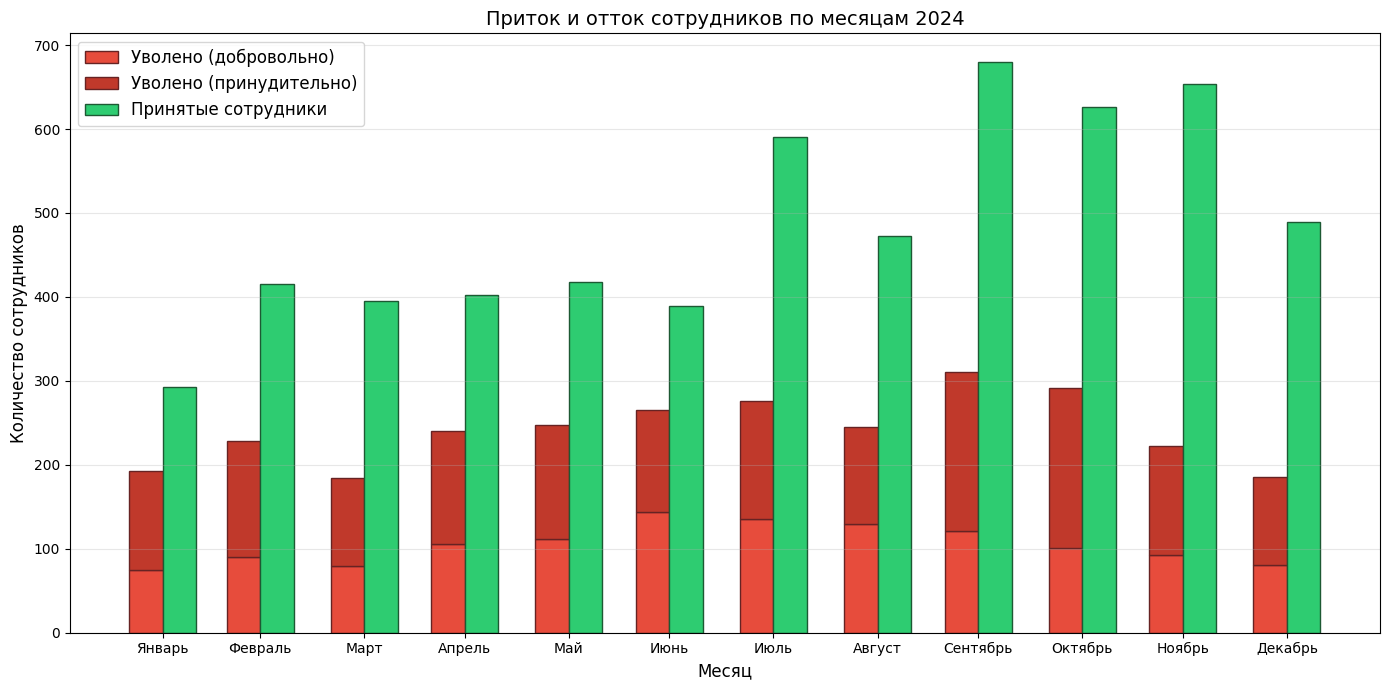

In [77]:
# Подготовка данных по найму
df_hired = df_add_cleaned_full_s.copy()
df_hired['HIRE_DATE'] = pd.to_datetime(df_hired['HIRE_DATE'])
df_hired_2024 = df_hired[df_hired['HIRE_DATE'].dt.year == 2024]

inflow_2024 = df_hired_2024.groupby(
    pd.Grouper(key='HIRE_DATE', freq='M')
)['PERSON_ID'].count().reset_index()
inflow_2024.columns = ['Month', 'Hired_Count']

# Подготовка данных по увольнениям с категориями
df_fired = df_add_fired2024_full_s.copy()
df_fired['TERMINATION_DATE'] = pd.to_datetime(df_fired['TERMINATION_DATE'])
df_fired_2024 = df_fired[(df_fired['TERMINATION_DATE'].dt.year == 2024) & 
                         (df_fired['TERMINATION_DATE'].dt.year != 2099)]

# Приводим тип увольнения к нижнему регистру для надёжности
df_fired_2024['TERMINATION_TYPE'] = df_fired_2024['TERMINATION_TYPE'].str.lower()

# Оставляем только две категории (voluntary, non-voluntary)
df_fired_2024 = df_fired_2024[df_fired_2024['TERMINATION_TYPE'].isin(['voluntary', 'non-voluntary'])]

# Группируем увольнения по месяцам и типам
outflow_2024 = df_fired_2024.groupby([
    pd.Grouper(key='TERMINATION_DATE', freq='M'),
    'TERMINATION_TYPE'
])['PERSON_ID'].count().unstack(fill_value=0)

# Превращаем индекс с датой в колонку и переименовываем
outflow_2024 = outflow_2024.reset_index()
outflow_2024 = outflow_2024.rename(columns={'TERMINATION_DATE': 'Month'})

# Создаём полный список месяцев 2024
full_months = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
flow_2024 = pd.DataFrame({'Month': full_months})

# Объединяем данные по найму и увольнениям
flow_2024 = flow_2024.merge(inflow_2024, on='Month', how='left')\
                     .merge(outflow_2024, on='Month', how='left')\
                     .fillna(0)

# Убедимся, что колонки есть (если нет - создадим с нуля)
for col in ['voluntary', 'non-voluntary']:
    if col not in flow_2024.columns:
        flow_2024[col] = 0

# Построение grouped stacked bar chart
plt.figure(figsize=(14, 7))

bar_width = 10  # ширина столбца в днях

months = flow_2024['Month']
months_short = [m.strftime('%b') for m in months]
months_russian = [months_dict.get(m, m) for m in months_short]

# Рисуем stacked bars для увольнений
plt.bar(months - pd.Timedelta(days=5), flow_2024['voluntary'], 
        width=bar_width, label='Уволено (добровольно)', color='#e74c3c',
        edgecolor='#662323', linewidth=1)

plt.bar(months - pd.Timedelta(days=5), flow_2024['non-voluntary'], 
        width=bar_width, bottom=flow_2024['voluntary'], label='Уволено (принудительно)', color='#c0392b',
        edgecolor='#662323', linewidth=1)

plt.bar(months + pd.Timedelta(days=5), flow_2024['Hired_Count'], 
        width=bar_width, label='Принятые сотрудники', color='#2ecc71',
        edgecolor='#1d5933', linewidth=1)

plt.title('Приток и отток сотрудников по месяцам 2024', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(months, months_russian, rotation=0)
plt.tight_layout()
plt.savefig(f'images/0_employees_netflow_2024')
plt.show()

In [42]:
outflow_2024 = df_fired_2024.groupby([
    pd.Grouper(key='TERMINATION_DATE', freq='M'),
    'TERMINATION_TYPE'
])['PERSON_ID'].count().unstack(fill_value=0)

print(outflow_2024.index.name)  # Должно быть 'TERMINATION_DATE'
print(outflow_2024.head())

TERMINATION_DATE
TERMINATION_TYPE  non-voluntary  voluntary
TERMINATION_DATE                          
2024-01-31                  117         75
2024-02-29                  138         90
2024-03-31                  105         79
2024-04-30                  135        105
2024-05-31                  136        111


C:\Users\xgorio\AppData\Local\Temp\ipykernel_15212\2863204637.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='TERMINATION_DATE', freq='M'),


# Подготовка датафрейма

In [57]:
df_add.loc[df_add['PERSON_ID'] == 8769].sort_values(by=['HIRE_DATE'])

,PERSON_ID,HIRE_DATE,TERMINATION_DATE,BIRTH_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION
263162,8769,01.02.2021,14.11.2023,09.03.1983,41,NaN,Военнообязанный,"Высшее образование - специалитет, магистратура"
100679,8769,01.11.2018,29.01.2021,09.03.1983,41,NaN,Военнообязанный,"Высшее образование - специалитет, магистратура"
105851,8769,12.05.2009,31.10.2018,09.03.1983,41,NaN,Военнообязанный,"Высшее образование - специалитет, магистратура"
276046,8769,20.11.2023,01.01.2099,09.03.1983,41,NaN,Военнообязанный,"Высшее образование - специалитет, магистратура"


In [40]:
df_employees = pd.concat([df_active_add_full_s, df_add_fired2024_full_s], ignore_index=True)

In [41]:
df_employees['ACTUAL_BIRTH_DATE'] = df_employees['BIRTH_DT'].combine_first(df_employees['BIRTH_DATE'])
df_employees = df_employees.drop(columns=['BIRTH_DT', 'BIRTH_DATE'])

df_employees['ACTUAL_HIRE_DATE'] = df_employees['HIRE_DATE'].combine_first(df_employees['RECEPTION_DT'])
df_employees = df_employees.drop(columns=['HIRE_DATE', 'RECEPTION_DT'])

In [42]:
df_employees['ACTUAL_BIRTH_DATE'] = df_employees['ACTUAL_BIRTH_DATE'].fillna(pd.NaT)
df_employees['SEX'] = df_employees['SEX'].fillna(0)
df_employees['CITY'] = df_employees['CITY'].fillna('Не указано')

df_employees['MARITAL_STATUS'] = df_employees['MARITAL_STATUS'].fillna('Не указано')
df_employees['MILITARY_SERVICE_STATUS'] = df_employees['MILITARY_SERVICE_STATUS'].fillna('Не указано')
df_employees['EDUCATION'] = df_employees['EDUCATION'].fillna('Не указано')
df_employees['VACATION_COUNT_2024'] = df_employees['VACATION_COUNT_2024'].fillna(0)
df_employees['LAST_VACATION_DATE'] = df_employees['LAST_VACATION_DATE'].fillna(pd.NaT)
df_employees['COURSES_2024_07'] = df_employees['COURSES_2024_07'].fillna(0)
df_employees['COURSES_2024_08'] = df_employees['COURSES_2024_08'].fillna(0)
df_employees['COURSES_2024_09'] = df_employees['COURSES_2024_09'].fillna(0)
df_employees['COURSES_2024_10'] = df_employees['COURSES_2024_10'].fillna(0)
df_employees['COURSES_2024_11'] = df_employees['COURSES_2024_11'].fillna(0)
df_employees['COURSES_2024_12'] = df_employees['COURSES_2024_12'].fillna(0)
df_employees['GR_UP_CHANGE'] = df_employees['GR_UP_CHANGE'].fillna(0)
df_employees['C_C_CHANGE'] = df_employees['C_C_CHANGE'].fillna(0)
df_employees['POS_D_CHANGE'] = df_employees['POS_D_CHANGE'].fillna(0)
df_employees['MARKS_2020'] = df_employees['MARKS_2020'].fillna(0)
df_employees['MARKS_2021'] = df_employees['MARKS_2021'].fillna(0)
df_employees['MARKS_2022'] = df_employees['MARKS_2022'].fillna(0)
df_employees['MARKS_2023'] = df_employees['MARKS_2023'].fillna(0)
df_employees['FULL_SENIORITY'] = df_employees['FULL_SENIORITY'].fillna(0)
df_employees['GRADE_SENIORITY_LAST'] = df_employees['GRADE_SENIORITY_LAST'].fillna(0)
df_employees['AVG_GRADE_SENIORITY'] = df_employees['AVG_GRADE_SENIORITY'].fillna(0)
df_employees['WAS_TRAINEE'] = df_employees['WAS_TRAINEE'].fillna('NO')
df_employees['DAYS_WITHOUT_VALID_REASONS'] = df_employees['DAYS_WITHOUT_VALID_REASONS'].fillna(0)
df_employees['COUNT_BAD_VACATIONS'] = df_employees['COUNT_BAD_VACATIONS'].fillna(0)
df_employees['LAST_BAD_VACATION_DATE'] = df_employees['LAST_BAD_VACATION_DATE'].fillna(pd.NaT)
df_employees['ILL_DAYS'] = df_employees['ILL_DAYS'].fillna(0)
df_employees['COUNT_ILL_VACATIONS'] = df_employees['COUNT_ILL_VACATIONS'].fillna(0)
df_employees['LAST_ILLNESS_DATE'] = df_employees['LAST_ILLNESS_DATE'].fillna(pd.NaT)
df_employees['OPERATION_DATE'] = df_employees['OPERATION_DATE'].fillna(pd.NaT)
df_employees['TERMINATION_REASON'] = df_employees['TERMINATION_REASON'].fillna('Не указано')
df_employees['DEPARTMENT'] = df_employees['DEPARTMENT'].fillna('Не указано')
df_employees['TERMINATION_TYPE'] = df_employees['TERMINATION_TYPE'].fillna('Не указано')

df_employees['TERMINATION_DATE'] = pd.to_datetime(df_employees['TERMINATION_DATE'], errors='coerce')
df_employees['IS_FIRED'] = df_employees['TERMINATION_DATE'].dt.year != 2099

In [44]:
df_employees[df_employees['PERSON_ID'] == 8769]

,PERSON_ID,SEX,CITY,GRADE,TERMINATION_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION,VACATION_COUNT_2024,...,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE,OPERATION_DATE,TERMINATION_REASON,DEPARTMENT,TERMINATION_TYPE,ACTUAL_BIRTH_DATE,ACTUAL_HIRE_DATE,IS_FIRED
498,8769,0.0,Брянск,2,2099-01-01,41.0,Не указано,Военнообязанный,"Высшее образование - специалитет, магистратура",4.0,...,0.0,0.0,NaT,NaT,Не указано,Не указано,Не указано,1983-03-09,2023-11-20,False


In [90]:
df_employees.to_pickle('df_employees.pkl')

display(df_employees.columns)
display(df_employees)

Index(['PERSON_ID', 'SEX', 'CITY', 'GRADE', 'TERMINATION_DATE', 'AGE',
       'MARITAL_STATUS', 'MILITARY_SERVICE_STATUS', 'EDUCATION',
       'VACATION_COUNT_2024', 'LAST_VACATION_DATE', 'COURSES_2024_07',
       'COURSES_2024_08', 'COURSES_2024_09', 'COURSES_2024_10',
       'COURSES_2024_11', 'COURSES_2024_12', 'GR_UP_CHANGE', 'C_C_CHANGE',
       'POS_D_CHANGE', 'MARKS_2020', 'MARKS_2021', 'MARKS_2022', 'MARKS_2023',
       'FULL_SENIORITY', 'GRADE_SENIORITY_LAST', 'AVG_GRADE_SENIORITY',
       'WAS_TRAINEE', 'DAYS_WITHOUT_VALID_REASONS', 'COUNT_BAD_VACATIONS',
       'LAST_BAD_VACATION_DATE', 'ILL_DAYS', 'COUNT_ILL_VACATIONS',
       'LAST_ILLNESS_DATE', 'OPERATION_DATE', 'TERMINATION_REASON',
       'DEPARTMENT', 'TERMINATION_TYPE', 'ACTUAL_BIRTH_DATE',
       'ACTUAL_HIRE_DATE', 'IS_FIRED'],
      dtype='object')

,PERSON_ID,SEX,CITY,GRADE,TERMINATION_DATE,AGE,MARITAL_STATUS,MILITARY_SERVICE_STATUS,EDUCATION,VACATION_COUNT_2024,...,ILL_DAYS,COUNT_ILL_VACATIONS,LAST_ILLNESS_DATE,OPERATION_DATE,TERMINATION_REASON,DEPARTMENT,TERMINATION_TYPE,ACTUAL_BIRTH_DATE,ACTUAL_HIRE_DATE,IS_FIRED
0,4004,0.0,Ростов на Дону,14,2099-01-01,46.0,Состоит в зарегистрированном браке,Военнообязанный,"Высшее образование - специалитет, магистратура",5.0,...,0.0,0.0,NaT,NaT,Не указано,Не указано,Не указано,1978-07-23,2014-01-01,False
1,4008,0.0,Ростов на Дону,13,2099-01-01,57.0,Никогда не состоял (не состояла в браке),Военнообязанный,"Высшее образование - специалитет, магистратура",2.0,...,0.0,0.0,NaT,NaT,Не указано,Не указано,Не указано,1967-01-31,2014-01-01,False
2,4011,0.0,Ростов на Дону,13,2099-01-01,55.0,Никогда не состоял (не состояла в браке),Невоеннообязанный,"Высшее образование - специалитет, магистратура",3.0,...,0.0,0.0,NaT,NaT,Не указано,Не указано,Не указано,1969-12-09,2014-01-01,False
3,4012,0.0,Ростов на Дону,16,2099-01-01,50.0,Состоит в зарегистрированном браке,Военнообязанный,"Высшее образование - специалитет, магистратура",3.0,...,0.0,0.0,NaT,NaT,Не указано,Не указано,Не указано,1974-04-16,2014-01-01,False
4,4015,1.0,Ростов на Дону,10,2099-01-01,64.0,Состоит в зарегистрированном браке,Не указано,"Высшее образование - специалитет, магистратура",5.0,...,16.0,2.0,2024-08-13,NaT,Не указано,Не указано,Не указано,1960-07-13,2014-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,124280,0.0,Не указано,1,2024-12-11,22.0,Состоит в зарегистрированном браке,Не указано,Среднее профессиональное образование,0.0,...,0.0,0.0,NaT,2024-12-11,баланс работа-личная жизнь,Контактные центры,voluntary,18.02.2002,2024-11-29,True
14848,124315,0.0,Не указано,1,2024-12-12,18.0,Не указано,Призывник,Среднее общее образование,0.0,...,0.0,0.0,NaT,2024-12-12,совмещение работы и учебы,Контактные центры,non-voluntary,01.08.2006,2024-11-29,True
14849,124331,0.0,Не указано,1,2024-12-10,30.0,Не указано,Не указано,Высшее образование - бакалавриат,0.0,...,0.0,0.0,NaT,2024-12-10,должностные обязанности,Контактные центры,voluntary,25.09.1994,2024-11-29,True
14850,124543,0.0,Не указано,1,2024-12-17,17.0,Не указано,Не указано,Основное общее образование,1.0,...,0.0,0.0,NaT,2024-12-17,совмещение работы и учебы,Контактные центры,non-voluntary,24.12.2007,2024-12-06,True
